In [ ]:
# to resume in a separate notebook the work with ~ 2000 genes that we have found to be liver-specific

In [102]:
suppressMessages({

library(data.table, quietly = TRUE)
library(plyr, quietly = TRUE)
library(doParallel,quietly = TRUE)
library(tidyverse, quietly = TRUE)
library("stringr", quietly = TRUE)
library("reactome.db")
library("AnnotationHub")
library("org.Hs.eg.db")
library("AnnotationDbi")
library("ReactomePA")
library("EnsDb.Hsapiens.v86")
library("clusterProfiler")
library("DOSE")
library(msigdbr)
})

cores <- detectCores()
cores
registerDoParallel(cores=cores)
options(future.globals.maxSize = Inf)

[1] 10

In [12]:
a = read.table("df4.pc.samples.of.interest.txt.liver.specific.genes.txt", header=T, sep="\t", stringsAsFactors=F)
head(a,2)
name = basename("df4.pc.samples.of.interest.txt.liver.specific.genes.txt")
GENES = a$gene
length(GENES)

,median_tpm_Liver,median_tpm_Other,LO,gene
,<dbl>,<dbl>,<dbl>,<chr>
1,28.935,20.460,1.414223,ISG15
2,5.877,4.422,1.329037,SCNN1D


[1] 1938

In [15]:
length(GENES)
GENES_id = bitr(GENES, fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Hs.eg.db")
GENES_entrez_id = GENES_id$ENTREZID
length(GENES_entrez_id)


[1] 1938

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(GENES, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Hs.eg.db"):
"0.62% of input gene IDs are fail to map..."


[1] 1928

In [ ]:
# In this part, we use the functions from ClusterProfiler to compute the pathway enrichment

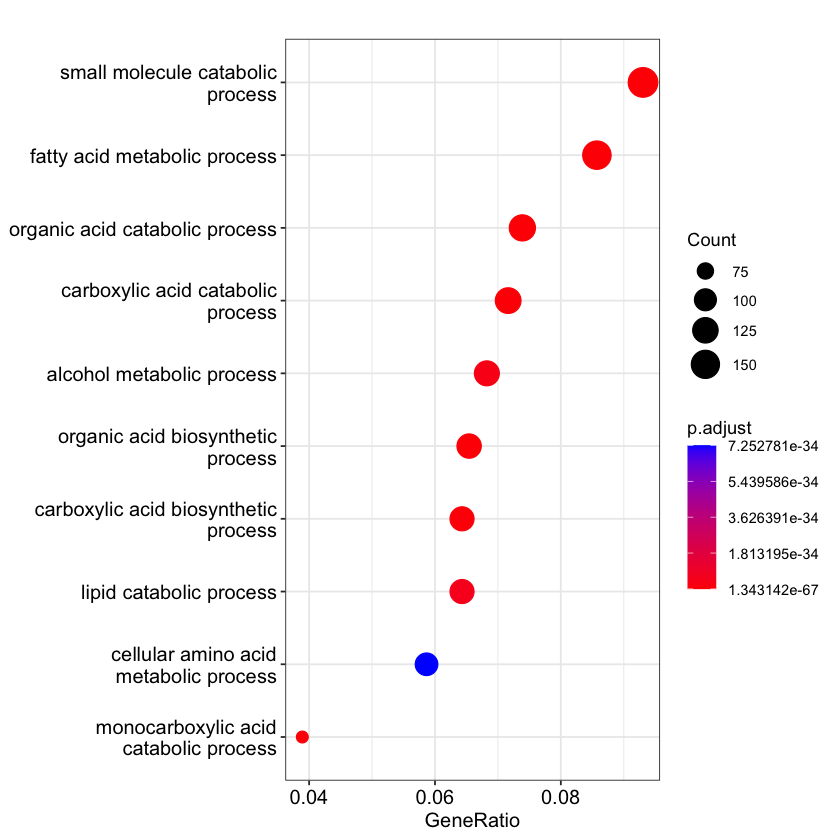

In [28]:
ego1 = enrichGO(gene = GENES_entrez_id,
                OrgDb        = org.Hs.eg.db,
                ont          = "BP",
                minGSSize    = 100,
                maxGSSize    = 500,
                pvalueCutoff = 0.01)
dotplot(ego1)

# The results are consistent with the biology of liver

In [51]:
library(createKEGGdb)
species <- "hsa"
createKEGGdb::create_kegg_db(species)

ERROR: Error in clusterProfiler:::kegg_list("pathway", species): unused argument (species)


In [47]:
kk <- enrichKEGG(gene         = GENES_entrez_id,
                 organism     = "hsa",
                 keyType="kegg",
                 pvalueCutoff = 1)
head(kk)

--> No gene can be mapped....

--> Expected input gene ID: 

--> return NULL...



NULL

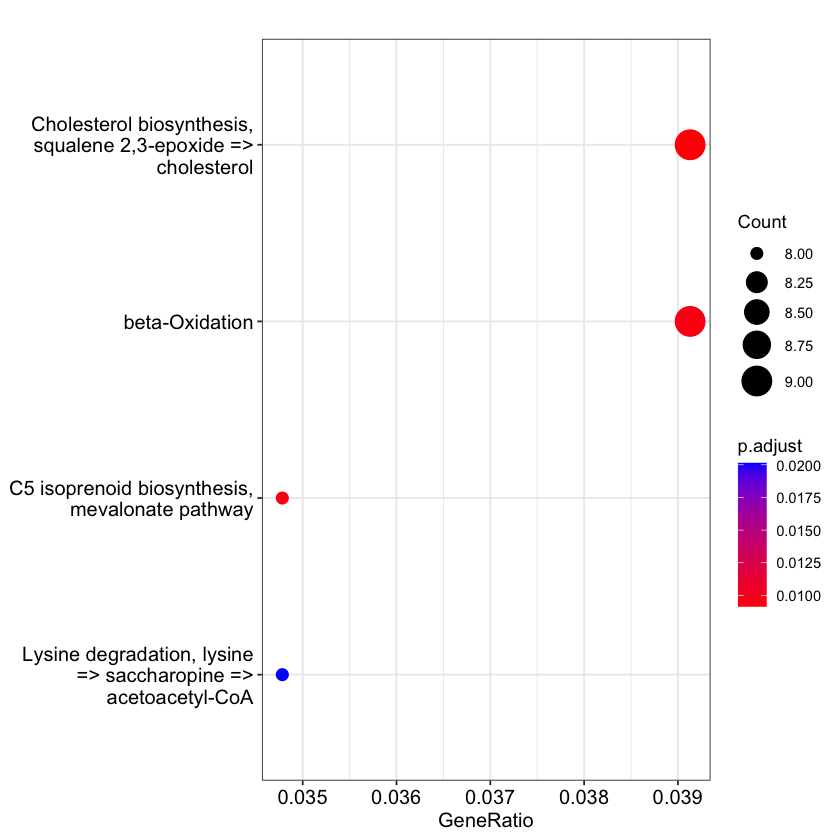

In [78]:
hsa <- search_kegg_organism('Homo sapiens', by='scientific_name')

mkk <- enrichMKEGG(gene = GENES_entrez_id,
                   organism = 'hsa',
                   pvalueCutoff = 0.1,
                   qvalueCutoff = 0.05)
dotplot(mkk)

In [76]:
wp = enrichWP(GENES_entrez_id, organism = "Homo sapiens") 

--> No gene can be mapped....

--> Expected input gene ID: 

--> return NULL...



In [77]:
gseWP(GENES_entrez_id, organism = "Homo sapiens")

ERROR: Error in GSEA_internal(geneList = geneList, exponent = exponent, minGSSize = minGSSize, : geneList should be a decreasing sorted vector...


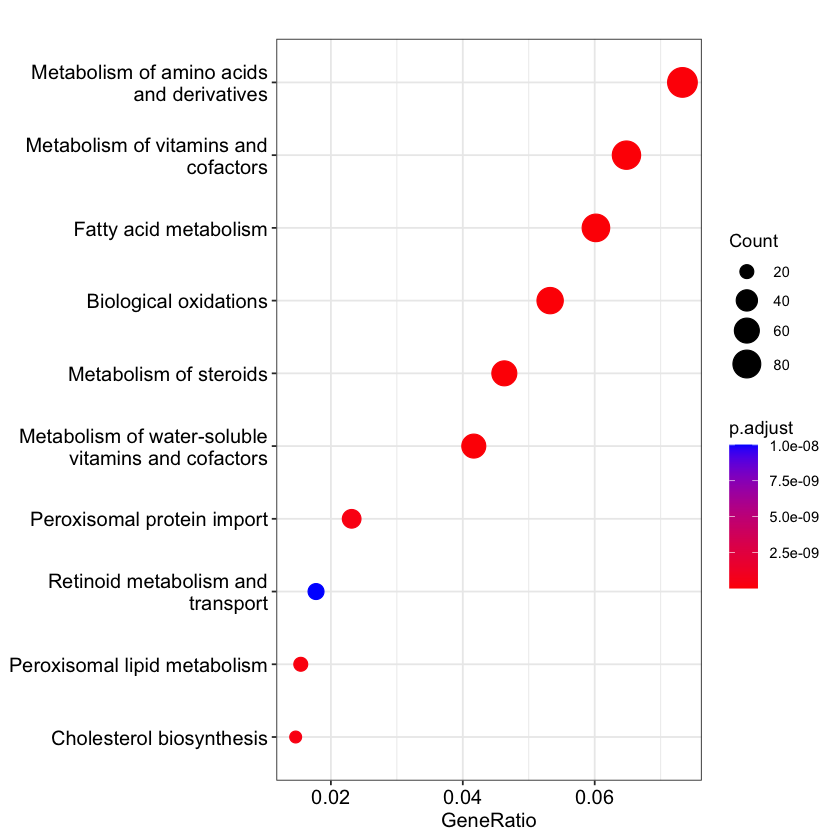

In [81]:
library("ReactomePA")
reactome_enrich <- enrichPathway(gene=GENES_entrez_id, pvalueCutoff = 1, readable=TRUE)
dotplot(reactome_enrich)



In [90]:
reactome_gse <- gsePathway(-order(GENES_entrez_id), 
                           pvalueCutoff = 1,
                           pAdjustMethod = "BH", 
                           verbose = FALSE)

ERROR: Error in GSEA_internal(geneList = geneList, exponent = exponent, minGSSize = minGSSize, : geneList should be a decreasing sorted vector...


[1] -1758 -1620 -1835  -457 -1674   -48  -533 -1894 -1504 -1593 -1552 -1058
  [13]  -870 -1005  -353 -1573 -1489  -544 -1268 -1667 -1194 -1082 -1283 -1033
  [25]   -67  -990 -1786  -750   -32 -1572  -755  -733 -1275  -851 -1315 -1917
  [37] -1594  -411  -170  -828 -1320  -920  -820 -1113  -865 -1750  -931   -66
  [49] -1223  -565 -1526  -370 -1043  -430  -803 -1698 -1626  -605 -1599 -1511
  [61]  -746  -537  -499 -1708 -1794  -619 -1887  -944  -249 -1042 -1827 -1370
  [73]  -617  -643  -459 -1012 -1537 -1763  -596  -128 -1442  -219 -1892  -710
  [85] -1452  -519 -1773   -16  -918  -549  -575 -1122  -586  -388 -1821 -1363
  [97] -1915 -1752  -428  -442 -1107 -1300  -883  -666 -1025  -896  -384 -1264
 [109]  -595 -1327   -61  -681 -1749  -348 -1253 -1761  -925 -1358 -1570  -697
 [121] -1748  -891 -1800 -1376  -351  -280    -9  -933  -934  -700 -1861 -1705
 [133]  -179  -493  -962 -1154  -197 -1067  -701 -1417 -1520 -1353  -507 -1432
 [145] -1007  -599 -1124 -1588  -911 -1535 -1205  -390   -49  -845 -1254 -1503
 [157]  -824   -59  -922 -1858 -1137 -1720  -352 -1629 -1306 -1543 -1538 -1416
 [169]  -129  -882 -1760  -831  -238  -573 -1656  -157 -1544 -1896 -1034 -1004
 [181] -1015 -1017  -798 -1338 -1163  -635 -1328  -856 -1383 -1482  -339 -1418
 [193]  -480 -1011 -1521  -481 -1598 -1557 -1619  -454  -482 -1679 -1657 -1721
 [205]   -55  -130   -27  -181 -1791 -1796  -255  -321  -226 -1828  -425  -906
 [217]  -989  -358  -458   -15  -485  -528 -1257 -1437  -522  -546  -561  -571
 [229] -1837  -403  -759  -769  -402  -720 -1515  -706 -1235  -723  -784  -369
 [241]  -302 -1117   -74  -808  -879  -929  -550  -138 -1809 -1882  -125 -1266
 [253]  -268 -1764 -1843 -1420   -85 -1152   -50 -1060 -1240 -1267 -1367 -1189
 [265] -1323 -1469 -1601  -587 -1541 -1604 -1596 -1632  -379 -1745 -1683 -1716
 [277]   -88   -84   -51 -1845   -57 -1480  -230  -253  -282  -283  -310  -225
 [289]  -216  -381  -504  -116 -1106  -331 -1798 -1806  -453 -1636  -473  -556
 [301]  -543  -685  -636  -728  -773  -719 -1002 -1867 -1040   -79  -810  -780
 [313]  -736  -946 -1366 -1901 -1902 -1016  -631  -309 -1285 -1304 -1490  -937
 [325]  -267 -1478 -1564 -1510   -97 -1759 -1659 -1715 -1400  -104  -168    -7
 [337]   -37   -56  -954  -955  -228 -1836  -382  -816  -441  -500  -783  -479
 [349]  -782 -1908  -691  -751  -734  -703 -1384 -1651 -1041 -1286 -1120   -76
 [361]  -554 -1472  -938  -980  -363  -628 -1404  -276   -94 -1811  -200  -607
 [373] -1251  -886  -590 -1238  -401 -1877 -1718 -1036  -898 -1778  -131  -915
 [385]  -712  -698  -415 -1217 -1037 -1477  -801  -178 -1181   -71  -113  -426
 [397]  -424 -1524 -1509 -1605 -1606 -1586  -385  -449  -506  -529  -542 -1505
 [409]  -492  -695  -819  -887  -917  -770   -81  -198  -797 -1693 -1221 -1582
 [421]  -684  -908 -1368 -1746  -357  -505 -1813  -463  -822  -374  -161 -1292
 [433]  -878  -597   -68 -1249 -1492  -889  -515 -1373  -873    -5 -1610 -1096
 [445]  -888 -1156 -1633  -874  -967  -968  -152  -150  -634  -151 -1738  -604
 [457]  -942  -941  -749  -133 -1272 -1453  -640 -1140  -702 -1531 -1382  -502
 [469]  -501  -431 -1026  -594  -503  -203 -1741  -494  -278  -999  -182  -583
 [481]  -897 -1185 -1428  -558  -342 -1488 -1119  -903 -1776   -24 -1536 -1697
 [493] -1409 -1168 -1139  -796 -1279 -1369 -1898  -832 -1872   -83  -847 -1540
 [505]  -943 -1412 -1092  -327 -1634 -1497  -163  -588  -164  -112  -232  -293
 [517]  -303  -704 -1006   -96  -899 -1085 -1585 -1863 -1427 -1284 -1458  -229
 [529] -1777  -792  -176 -1848  -263   -89 -1405  -204  -525 -1727  -115 -1499
 [541]  -552 -1832 -1771 -1083  -875  -747  -663   -30  -175 -1736 -1635 -1277
 [553] -1155  -927  -960 -1114 -1517 -1410 -1754 -1685 -1045  -553  -909  -315
 [565] -1639  -316  -972  -496   -34  -653 -1399 -1591 -1206 -1075  -516  -159
 [577] -1123  -356  -910  -199  -866  -336 -1642  -375  -308  -988   -65 -1126
 [589]  -338 -1097 -1365 -1799  -717  -328 -1389  -526 -1533  -405 -1070  -107
 [601]   -17  -286 -1357   -90 -1684 -1316 -1349  -22

In [99]:
disease <- enrichDO(gene          = GENES_entrez_id,
              ont           = "DO",
              pvalueCutoff  = 1,
              pAdjustMethod = "BH",
              universe      = GENES_entrez_id,
              minGSSize     = 5,
              maxGSSize     = 500,
              qvalueCutoff  = 1,
              readable      = FALSE)

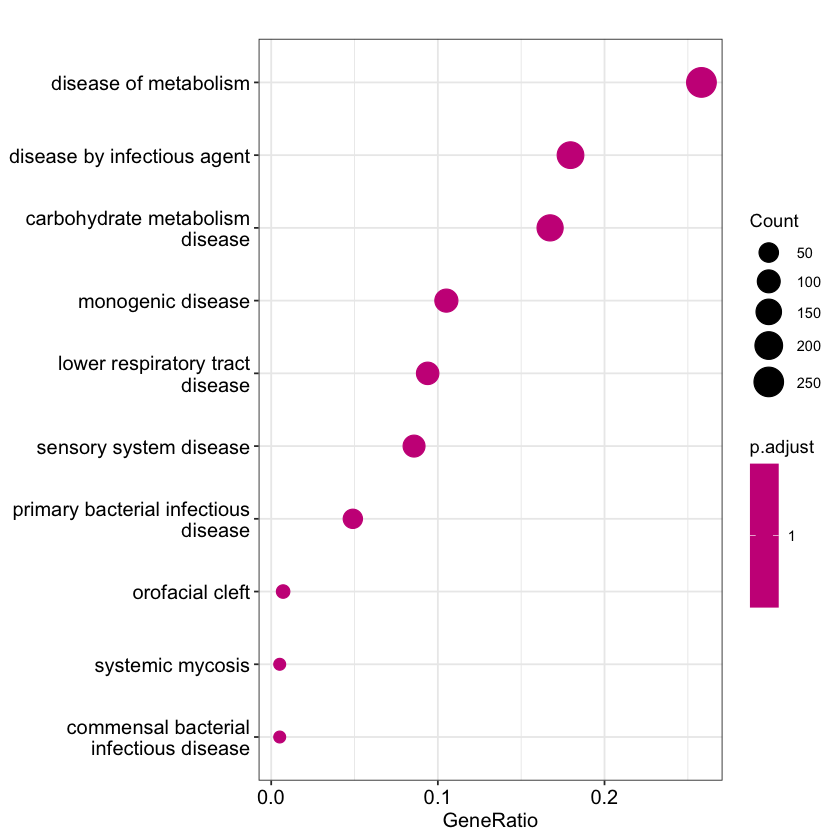

In [100]:
dotplot(disease)

In [104]:
m_df <- msigdbr(species = "Homo sapiens")
m_t2g <- msigdbr(species = "Homo sapiens", category = "C6") %>% dplyr::select(gs_name, entrez_gene)

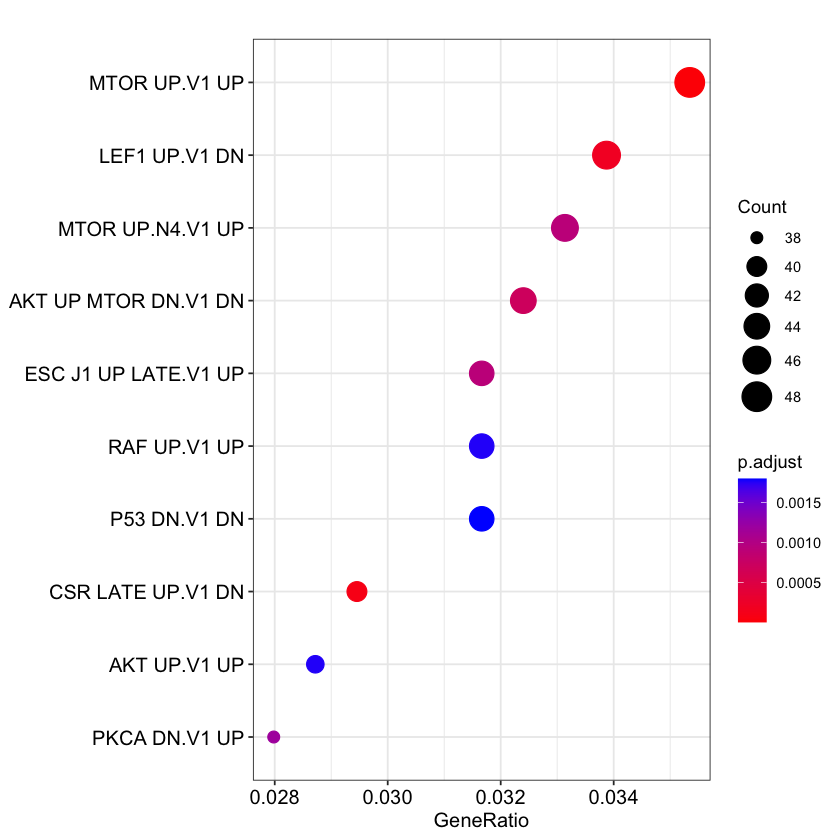

In [106]:
em <- enricher(GENES_entrez_id, TERM2GENE=m_t2g)
dotplot(em)

In [107]:
cancer <- enrichNCG(GENES_entrez_id)
dotplot(cancer)

Warning message in rep(yes, length.out = len):
"'x' is NULL so the result will be NULL"
ERROR while rich displaying an object: Error in ans[ypos] <- rep(yes, length.out = len)[ypos]: replacement has length zero

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr